# hdWGCNA: Prep for network construction

In [1]:
# Conversion libraries and Seurat
library(SeuratDisk)
library(SeuratData)
library(Seurat)
library(Signac)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject

Attaching sp

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::reduce() masks Signac::reduce()


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




In [2]:
# Parameters
NN <- 25
GENES <- "all"
TARGET_CELLS = 1000

In [3]:
# Files and directories
RDS_OBJ = "/cellar/users/aklie/data/igvf/topic_grn_links/mouse_adrenal/auxiliary_data/snrna/adrenal_Parse_10x_integrated.rds"
NAME = "normalized"
OUT = "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/mouse_adrenal/hdwgcna/result/"

In [4]:
# Read in the R object
seurat_obj <- readRDS(RDS_OBJ)
seurat_obj

An object of class Seurat 
82892 features across 79209 samples within 3 assays 
Active assay: SCT (32171 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

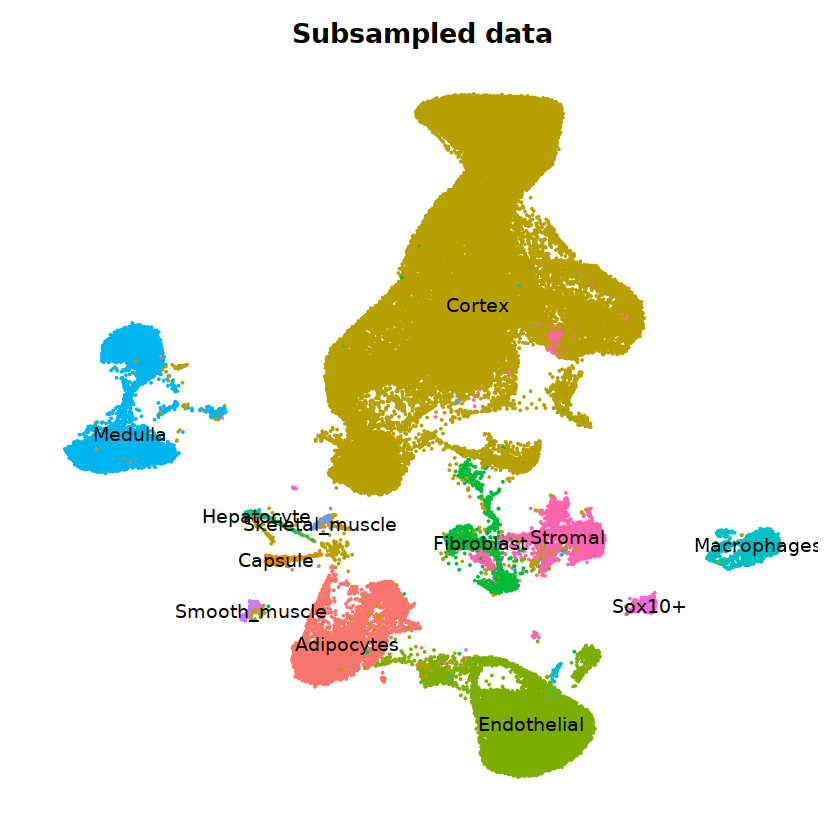

In [5]:
# Plot UMAP
p1 <- DimPlot(seurat_obj, group.by='celltypes', reduction="umap", label=TRUE) +
   umap_theme() + ggtitle('Mouse data') + NoLegend()
p1

In [15]:
# construct co-expression network:
seurat_obj <- ConstructNetwork(
  seurat_obj, 
  soft_power=power,
  use_metacells=TRUE,
  setDatExpr=FALSE,
  tom_out_dir=OUT,
  tom_name=NAME # name of the topoligical overlap matrix written to disk
)

 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


In [18]:
# compute all MEs in the full single-cell dataset
seurat_obj <- ModuleEigengenes(seurat_obj, assay="RNA", verbose=FALSE)

[1] "grey"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagrey to pcagrey_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagrey_”


[1] "turquoise"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaturquoise to pcaturquoise_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcaturquoise_”


[1] "blue"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablue to pcablue_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcablue_”


[1] "brown"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcabrown to pcabrown_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcabrown_”


In [55]:
# compute eigengene-based connectivity (kME):
seurat_obj <- ModuleConnectivity(
    seurat_obj,
    assay=ASSAY,
    slot="data",
    harmonized=FALSE
)

Warning message in bicor(datExpr, datME, , use = "p"):
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


In [58]:
# Save the fully processed Seurat object to be used in all the other notebooks
saveRDS(seurat_obj, file=file.path(OUT, paste0(NAME, "_hdWGCNA.rds")))

---

# Scratch